In [2]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from PIL import Image
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator



In [3]:
def display_grid(data, path, w =10, h =10, columns = 4, rows = 5):
    fig=plt.figure(figsize=(12, 8))
    for i in range(1, columns*rows +1):
        file = data[i]
        file = os.path.join(path, file)
        img = Image.open(file)
        fig.add_subplot(rows, columns, i)
        imshow(img)
    plt.show()
    
def plot_results(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    


    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()
 
def get_best_epcoh(history):
    valid_acc = history.history['val_acc']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

## Class Swift

In [4]:
base_dir = '/Users/vlasov/PycharmProjects/Identify-a-Car-Model-with-Deep-Learning/kaggle/'
train_swift = os.listdir(os.path.join(base_dir, 'train/swift') )
val_swift  = os.listdir(os.path.join(base_dir, 'validation/swift') )
test_swift  =  os.listdir(os.path.join(base_dir, 'test/swift') )
print('Instances for Class Swift: Train {}, Validation {} Test {}'.format(len(train_swift), len(val_swift), len(test_swift)))

Instances for Class Swift: Train 1200, Validation 400 Test 400


In [5]:
#Sanity checks: no overlaping bteween train test and validation sets
val_train = [x for x in val_swift if x in train_swift]
test_train = [x for x in test_swift if x in train_swift]
val_test =  [x for x in test_swift if x in val_swift]
len(val_train), len(test_train), len(val_test)

(0, 0, 0)

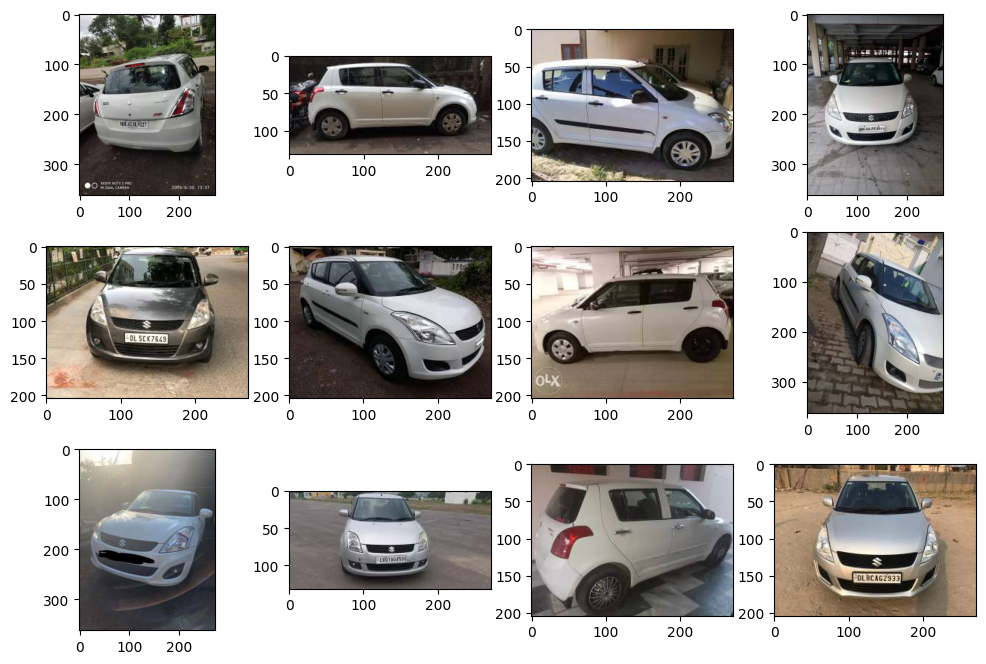

In [6]:
display_grid(data = train_swift, path = os.path.join(base_dir, 'train/swift'), w =10, h =10, columns = 4, rows = 3)

## Class Wagonr

In [7]:
train_wr = os.listdir(os.path.join(base_dir, 'train/wagonr') )
val_wr  = os.listdir(os.path.join(base_dir, 'validation/wagonr') )
test_wr  =  os.listdir(os.path.join(base_dir, 'test/wagonr') )
print('Instances for Class Wagonr: Train {}, Validation {} Test {}'.format(len(train_swift), len(val_swift), len(test_swift)))

Instances for Class Wagonr: Train 1200, Validation 400 Test 400


In [8]:
#Sanity checks: no overlaping bteween train test and validation sets
val_train = [x for x in val_wr if x in train_wr]
test_train = [x for x in test_wr if x in train_wr]
val_test =  [x for x in test_wr if x in val_wr]
len(val_train), len(test_train), len(val_test)

(0, 0, 0)

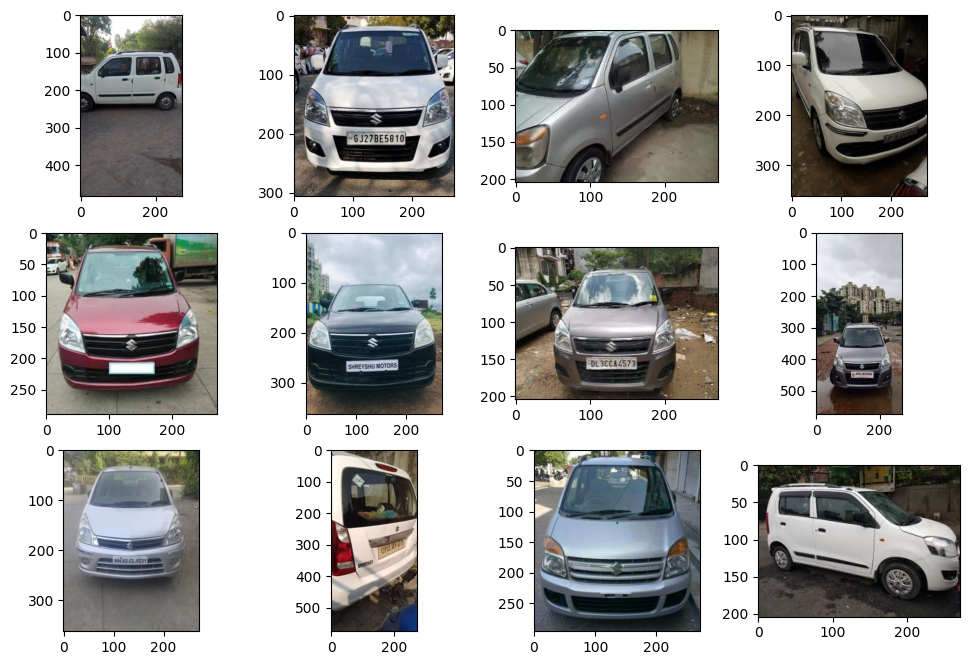

In [9]:
display_grid(data = train_wr, path = os.path.join(base_dir, 'train/wagonr'), w =10, h =10, columns = 4, rows = 3)

## Train using Convolution: 

In [10]:
def build_cnn(display_summary =False):
    model = models.Sequential()
    model.add( layers.Conv2D(32, (3,3),  activation= 'relu', input_shape = (150, 150, 3)) )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(64, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(128, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add( layers.Conv2D(128, (3,3),  activation= 'relu') )
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation= 'relu'))
    model.add(layers.Dense(1, activation= 'sigmoid'))

    model.compile(loss = 'binary_crossentropy',
                  optimizer = optimizers.RMSprop(lr = 1e-4),
                  metrics = ['acc']
                  )
    if display_summary:
       model.summary()
    return model

### Data Preprocessing

In [11]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation' )

train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
                                                   train_dir,              
                                                   target_size = (150,150), #Resize images to 150 X 150
                                                   batch_size  = 20,
                                                   class_mode = 'binary'
                                                   )
validation_generator = test_datagen.flow_from_directory(
                                                   validation_dir,              
                                                   target_size = (150,150), #Resize images to 150 X 150
                                                   batch_size  = 20,
                                                   class_mode = 'binary'
                                                   )

for data_batch, labels_batch, in train_generator:
    print('Data Batch shape:', data_batch.shape)
    print('Labels Batch shape:', labels_batch.shape)
    break

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Data Batch shape: (20, 150, 150, 3)
Labels Batch shape: (20,)


### Fit Model

In [12]:
model = build_cnn(display_summary = True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2022-12-06 11:38:18.040864: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
%%time
history = model.fit_generator(
                            train_generator,
                            steps_per_epoch = 120,  # = num_train_images/batch size(2400/20)
                            epochs = 50,
                            validation_data = validation_generator,
                            validation_steps = 40  # = num_valid_images/batch_size
                             )
model.save('cat_and_dogs.h5')

Epoch 1/50


<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


120/120 [==============================] - 41s 329ms/step - loss: 0.6823 - acc: 0.5679 - val_loss: 0.6386 - val_acc: 0.6150
Epoch 2/50
120/120 [==============================] - 46s 387ms/step - loss: 0.6122 - acc: 0.6700 - val_loss: 0.6323 - val_acc: 0.6438
Epoch 3/50
120/120 [==============================] - 50s 412ms/step - loss: 0.5211 - acc: 0.7433 - val_loss: 0.4942 - val_acc: 0.7663
Epoch 4/50
120/120 [==============================] - 42s 348ms/step - loss: 0.4381 - acc: 0.7925 - val_loss: 0.4642 - val_acc: 0.7788
Epoch 5/50
120/120 [==============================] - 49s 407ms/step - loss: 0.3864 - acc: 0.8238 - val_loss: 0.4406 - val_acc: 0.7862
Epoch 6/50
120/120 [==============================] - 55s 459ms/step - loss: 0.3413 - acc: 0.8529 - val_loss: 0.3837 - val_acc: 0.8363
Epoch 7/50
120/120 [==============================] - 50s 413ms/step - loss: 0.3015 - acc: 0.8767 - val_loss: 0.3633 - val_acc: 0.8388
Epoch 8/50
120/120 [==============================] - 52s 432ms/st

### Train Vs Validation Accuracy/Loss

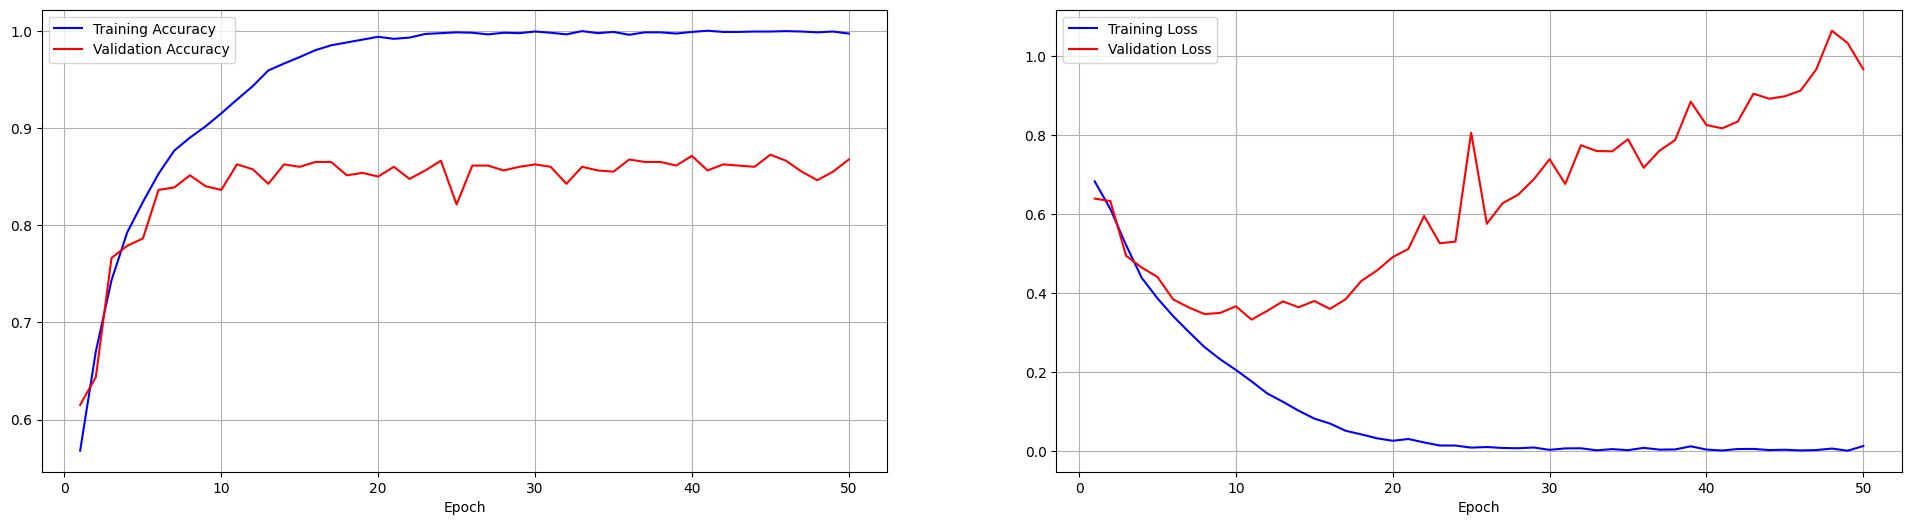

Best Validation Accuracy Score 0.87250, is for epoch 45


In [14]:
plot_results(history)
best_epoch =get_best_epcoh(history)